In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import requests
from bs4 import BeautifulSoup

#initialize empty list to store movies
movies = []

#iterate through pages
for i in range(1,1734):
    url = f'https://subslikescript.com/movies?page={i}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    scripts_list = soup.find("ul", {"class": "scripts-list"})
    links = scripts_list.find_all("a")
    for link in links:
        movie = link.text
        movies.append(movie)

C:\Users\Fırat Olçum\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


['Et knæk (2016)', 'Gunfight at Rio Bravo (2023)', 'Hank and Jolene (2021)', 'High Expectations (2022)', 'Support Group Olympus (2021)', 'Sven Klangs kvintett (1976)', 'Johnny Angel (1945)', 'Desperado: Badlands Justice (1989)', 'Family History Mysteries: Buried Past (2023)', 'My 3 Boys (2018)', 'The Wait (2021)', 'The Goblin (2021)', 'How We Got Gay (2013)', 'Mukundan Unni Associates (2022)', 'Cirkusrevyen 67 (1967)', 'Yasmin (2004)', 'The Executioner (1974)', 'Spy Nation (2016)', 'Yuri no Amaoto (2022)', 'The Erlprince (2016)', 'Carmen (1918)', 'Making Wolf s Path (2022)', 'Kingdom II: Harukanaru Daichi e (2022)', 'The Hatchet Wielding Hitchhiker (2023)', 'Vilde, the Wild One (1986)', 'Love, Sex, Religion (2018)', 'The Drop (2022)', "Chile '76 (2022)", 'Mister Mummy (2022)', 'Metallica: Orgullo pasión y gloria. Tres noches en la ciudad de México. (2009)', 'Gitano (2000)', 'How to Keep the Red Lamp Burning (1965)', 'The Paradine Case (1947)', 'Kaybedenler Kulübü Yolda (2018)', 'Conan 

In [4]:
len(movies)

51990

In [25]:
movie_names = []
years = []
for movie in movies:
    movie_names.append(movie.rsplit(" ", 1)[0])
    years.append(movie.rsplit(" ", 1)[1].strip("(").strip(")"))

In [27]:
len(movie_names)

51990

In [29]:
len(years)

51990

In [34]:
df = pd.DataFrame({"movie_names" : movie_names, "years" : years})

In [35]:
df.head()

,movie_names,years
0,Et knæk,2016
1,Gunfight at Rio Bravo,2023
2,Hank and Jolene,2021
3,High Expectations,2022
4,Support Group Olympus,2021


In [46]:
count_df = df.groupby("years")["movie_names"].count().reset_index(name="count_of_movie")
count_df.sort_values(by="years", inplace=True)
count_df.head()

,years,count_of_movie
0,1893,1
1,1894,1
2,1906,1
3,1908,2
4,1910,1


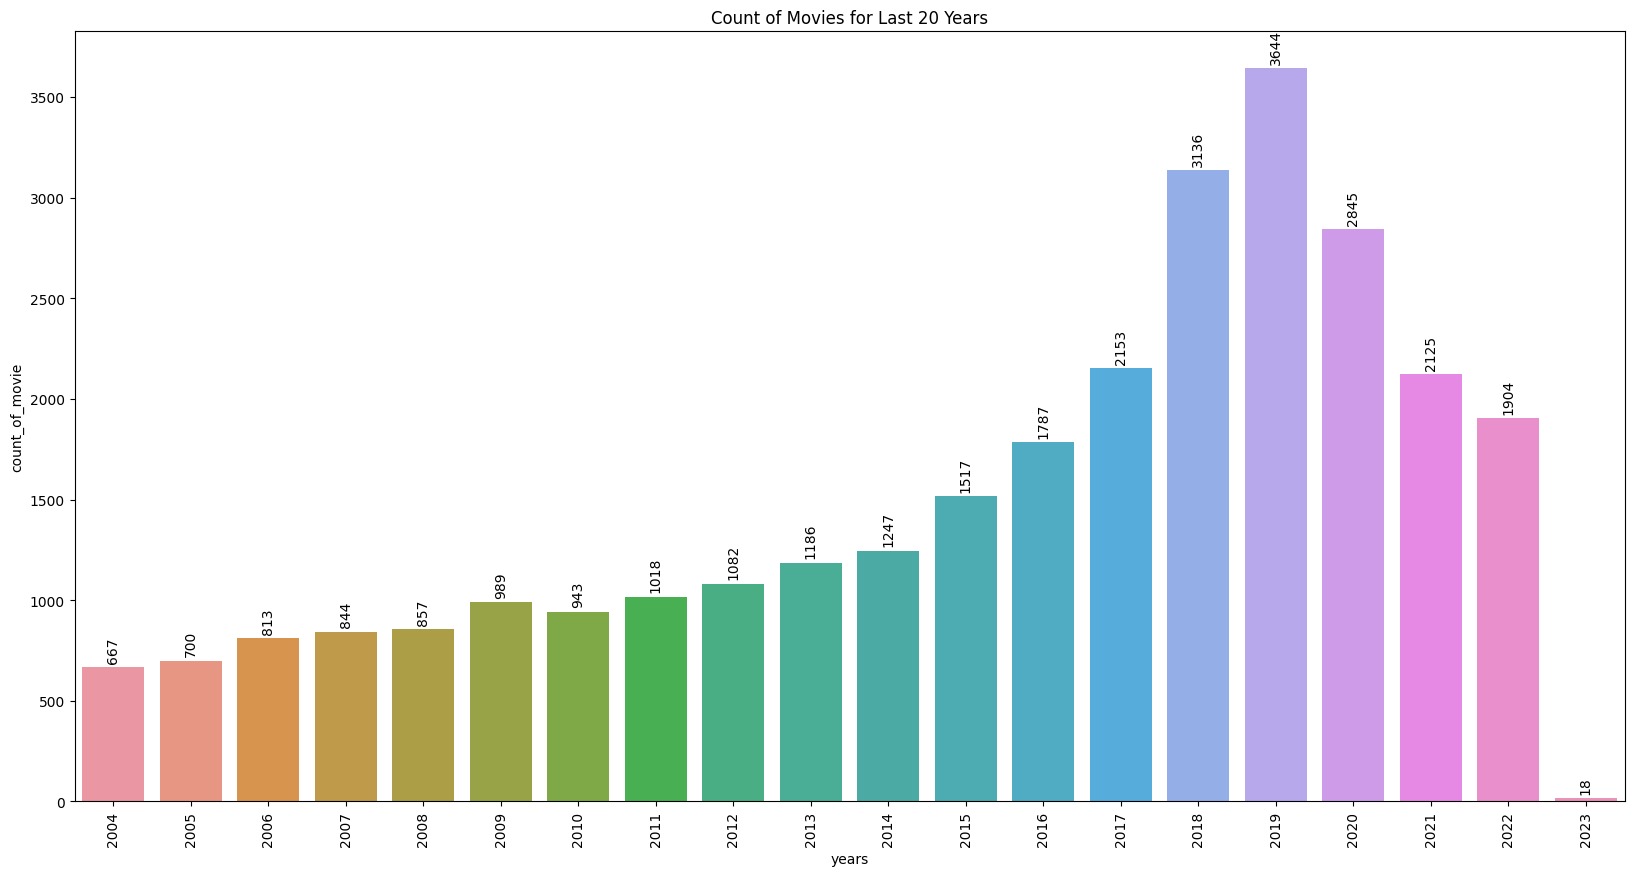

In [76]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=count_df[-20:], x = "years", y = "count_of_movie")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=90, padding=3)
plt.title("Count of Movies for Last 20 Years")
plt.show()


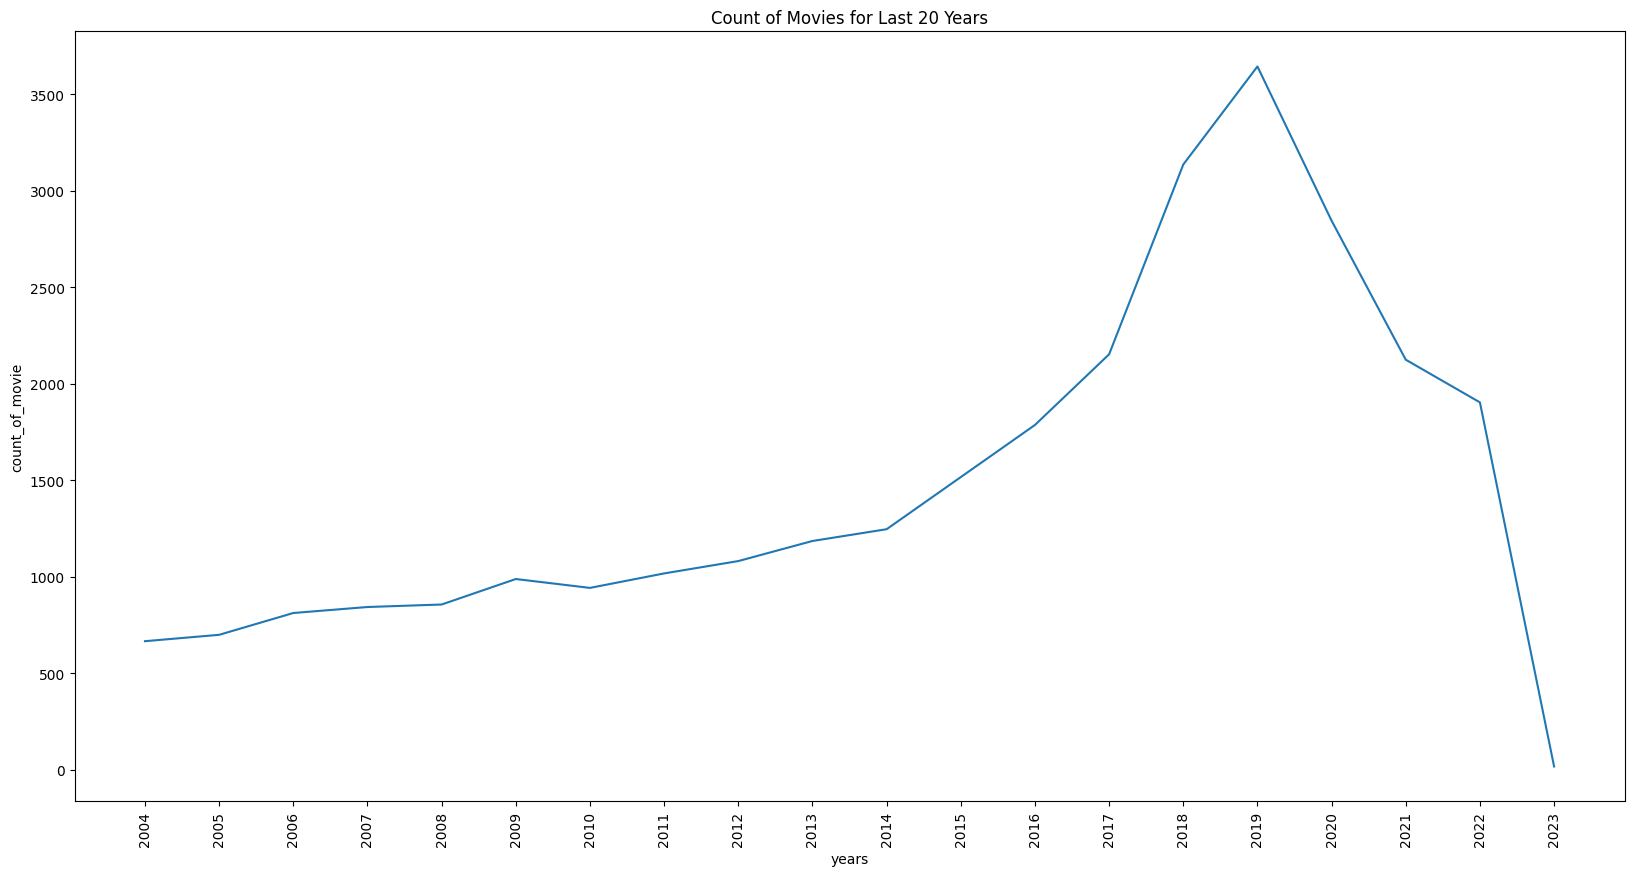

In [77]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data=count_df[-20:], x = "years", y = "count_of_movie")
plt.title("Count of Movies for Last 20 Years")
plt.xticks(rotation=90)
plt.show()

In [78]:
df.to_csv("all_movies.csv")